In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os, sys
from astropy.io import fits
from lightkurve.lightcurve import LightCurve as LC

In [3]:
directory = '/Users/AdinaFeinstein/Downloads/'
files = os.listdir(directory)
targets = [i for i in files if 'TIC' in i]

In [6]:
fluxes = []
cdpps, mags = [] ,[]
for t in targets:
    hdu  = fits.open(directory+t)
    mag = hdu[0].header['TMAG']
    q = hdu[1].data['QUALITY'] == 0
    flux = hdu[1].data['CORR_FLUX']
    fluxes.append(np.array(flux)/np.nanmedian(flux))
    cdpp = LC(time=hdu[1].data['TIME'][q][0:600], flux=flux[q][0:600]).estimate_cdpp(transit_duration=2)
    mags.append(mag)
    cdpps.append(cdpp)
fluxes = np.array(fluxes)

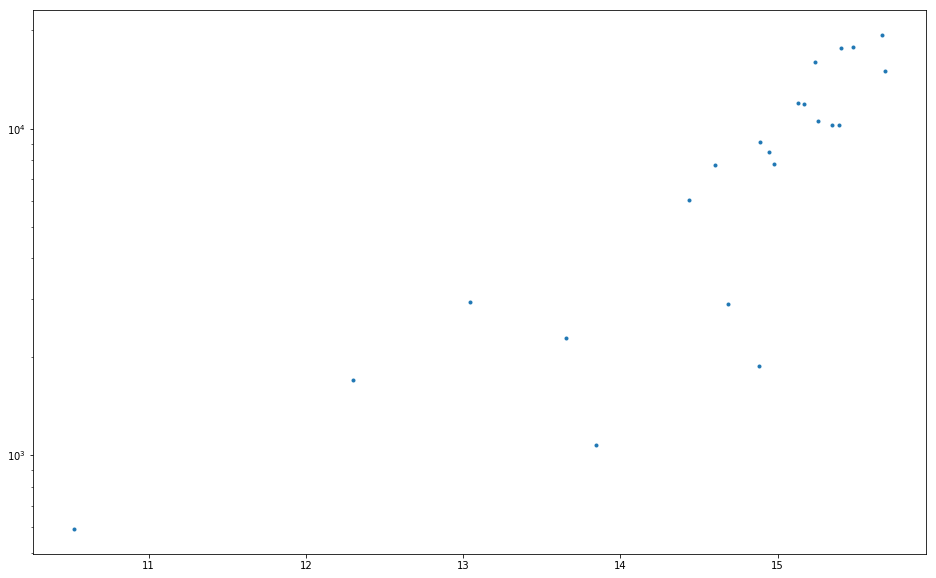

In [8]:
plt.figure(figsize=(16,10))
plt.semilogy(mags, cdpps, '.')
plt.show()

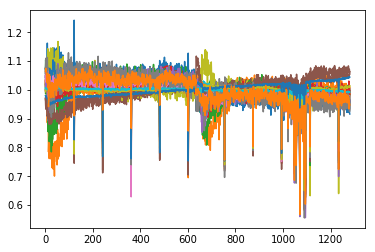

In [20]:
plt.plot(fluxes.T)
plt.show()

In [90]:
pca = PCA(n_components=4)

In [91]:
commons = pca.fit(fluxes.T)
transform = pca.transform(fluxes.T)

In [92]:
transform[:,0]

array([-0.18309613, -0.17031454, -0.18458051, ...,  0.09266309,
        0.10965268,  0.0886739 ])

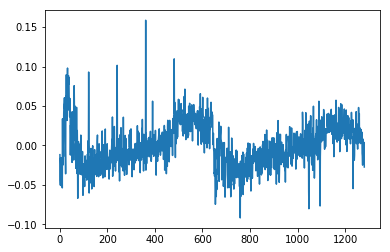

In [93]:
plt.plot(transform[:,3])

In [94]:
pca.explained_variance_ratio_

array([0.58566725, 0.22671932, 0.09035797, 0.01797021])

In [95]:
A = transform#[:,0:3]
f = fluxes[1]
ATA = np.dot(A.T, A)
invATA  = np.linalg.inv(ATA)
A_coeff = np.dot(invATA, A.T)
weights = np.dot(A_coeff, f) ## same as xhat

In [96]:
science = f - np.dot(A, weights)

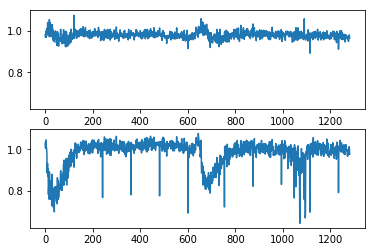

In [97]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharey=True)
ax1.plot(science)
ax2.plot(f)

In [100]:
np.save('pca_components', A)